In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
import time
import os
import cv2
import tensorflow as tf
import matplotlib.image as mpimg
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.datasets import fetch_olivetti_faces
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score
from skimage.transform import resize
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from skimage.color import rgb2gray
from tqdm.notebook import tqdm
from mpl_toolkits.mplot3d import Axes3D
from tensorflow.keras import layers, models
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Conv2D, Conv1D, MaxPooling2D, Flatten, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import optimizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
gpus = tf.config.experimental.list_physical_devices('GPU') #with import tensorflow
tf.config.experimental.set_memory_growth(gpus[0], True) # me too

2024-03-22 10:54:54.186057: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-22 10:54:54.240178: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-22 10:54:54.240313: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-22 10:54:54.240384: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-22 10:54:54.255602: I tensorflow/core/platform/cpu_feature_g

In [2]:
# path = "./data/"
# labels = []
# file_id = []
# full_names = []
# lables = os.listdir(path)
# for label in lables:
#     data_names = os.listdir(path+ "/" +label)
#     for name in data_names:
#         labels.append(label)
#         file_id.append(name)
#         full_names.append(label + "/" + name)

# full_names

In [3]:
xyz_df = pd.read_csv("./merge_sp.csv")
xyz_df.head(40)


,x,y,z,label
0,0.000000,0.000000,0.000000,29
1,0.025550,0.067353,-0.063020,29
2,0.016752,0.137709,-0.097287,29
3,-0.012997,0.195587,-0.108628,29
4,-0.048682,0.228576,-0.118143,29
5,-0.043438,0.087914,-0.165980,29
6,-0.099320,0.147953,-0.195402,29
7,-0.136327,0.177091,-0.192493,29
8,-0.164715,0.195230,-0.184031,29
9,-0.076180,0.074541,-0.126534,29


In [4]:
labels = xyz_df["label"]
xyz_df = xyz_df.drop("label", axis=1)

In [5]:
xyz_df.shape

(158844, 3)

In [6]:
arr = np.array([xyz_df.iloc[i:i+21, :].to_numpy() for i in range(0, len(xyz_df), 21)])
arr.shape

(7564, 21, 3)

In [7]:
new_labels = []
for i in range(0, len(labels), 21):
    new_labels.append(labels[i])
    # print(i)
print(len(new_labels))

7564


In [8]:
# new_labels

In [9]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(new_labels)
labels_encoded = encoder.transform(new_labels)
labels_encoded[:3], encoder.classes_

(array([22, 22, 22]),
 array(['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18',
        '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28',
        '29', '3', '30', '4', '5', '6', '7', '8', '9', 'backspace',
        'question', 'shift', 'space'], dtype='<U9'))

In [10]:
############# 라벨이 각 x,y,z 값마다 달려있어서 개수가 안맞음 수정필요
X_train, X_test, y_train, y_test = train_test_split(arr, labels_encoded, test_size=0.2,
                                                    random_state=13, stratify=labels_encoded)
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)
X_train.shape, X_test.shape

((6051, 21, 3), (1513, 21, 3))

In [11]:
model = Sequential()

model.add(Conv1D(filters=32, kernel_size=3, input_shape=(21, 3)))
model.add(Activation("relu"))

model.add(Conv1D(10, 3))
model.add(Activation("relu"))

model.add(Conv1D(10, 3))
model.add(Activation("relu"))

model.add(Flatten())
model.add(Dense(10))
model.add(Activation("relu"))
model.add(Dense(35))  # 출력 레이어, 클래스의 개수에 맞게 노드 개수 조정
model.add(Activation("softmax"))  # 다중 클래스 분류를 위해 softmax 사용

model.summary()

2024-03-22 10:55:04.928310: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-22 10:55:04.929635: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-22 10:55:04.929905: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 19, 32)            320       
                                                                 
 activation (Activation)     (None, 19, 32)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 17, 10)            970       
                                                                 
 activation_1 (Activation)   (None, 17, 10)            0         
                                                                 
 conv1d_2 (Conv1D)           (None, 15, 10)            310       
                                                                 
 activation_2 (Activation)   (None, 15, 10)            0         
                                                                 
 flatten (Flatten)           (None, 150)               0

In [12]:
model.compile(loss="categorical_crossentropy",
              optimizer=optimizers.Adam(learning_rate=0.0002),
              metrics=["accuracy"])

In [13]:
batch_size = 32
his = model.fit(
    X_train, y_train_encoded,
    epochs=100,
    batch_size=batch_size,
    validation_data=(X_test, y_test_encoded),
    validation_steps=len(X_test) // batch_size
)

Epoch 1/100


2024-03-22 10:55:11.023468: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8700
2024-03-22 10:55:12.983999: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x721c24001dd0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-03-22 10:55:12.984052: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2024-03-22 10:55:12.992563: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-03-22 10:55:13.141214: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


190/190 [==============================] - 11s 17ms/step - loss: 3.5368 - accuracy: 0.0478 - val_loss: 3.4935 - val_accuracy: 0.0785
Epoch 2/100
190/190 [==============================] - 2s 13ms/step - loss: 3.3593 - accuracy: 0.0808 - val_loss: 3.1804 - val_accuracy: 0.0931
Epoch 3/100
 78/190 [===========>..................] - ETA: 1s - loss: 3.1381 - accuracy: 0.1098

KeyboardInterrupt: 

In [18]:
model.save("handModel.h5")

/home/rds/venv/opencv_venv/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


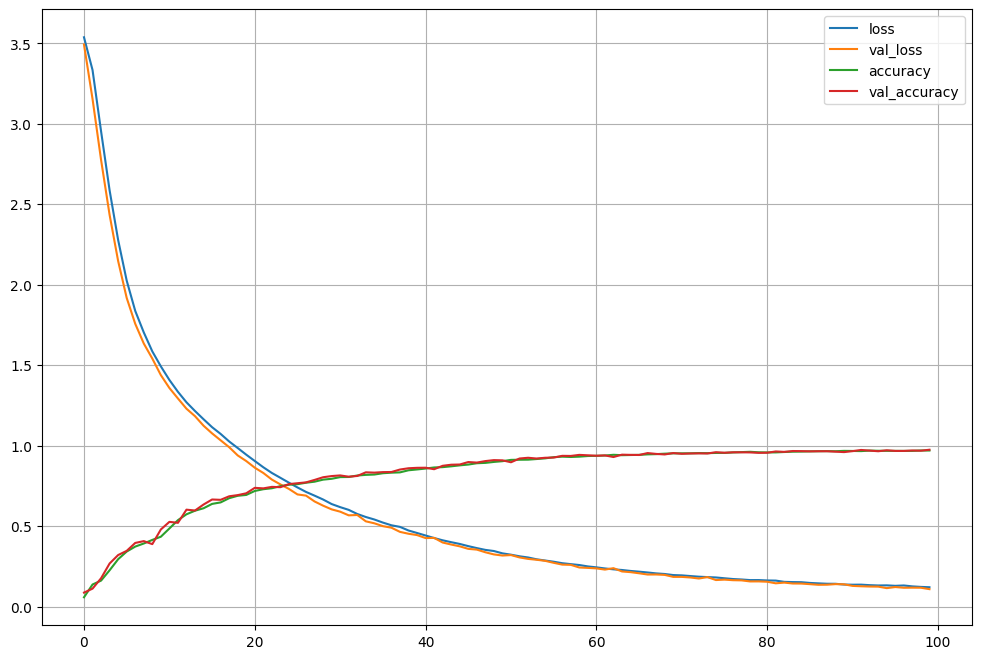

In [19]:

plot_target = ["loss", "val_loss", "accuracy", "val_accuracy"]

plt.figure(figsize=(12,8))
for each in plot_target:
    plt.plot(his.history[each], label=each)

plt.legend()
plt.grid()
plt.show()